<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Описание данных</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Выводы" data-toc-modified-id="Выводы-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Изучение-основных-параметров" data-toc-modified-id="Изучение-основных-параметров-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Изучение основных параметров</a></span></li><li><span><a href="#Изучение-времени-продажи-квартиры" data-toc-modified-id="Изучение-времени-продажи-квартиры-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Изучение времени продажи квартиры</a></span></li><li><span><a href="#Работа-с-редкими-и-выбивающиеся-значения" data-toc-modified-id="Работа-с-редкими-и-выбивающиеся-значения-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Работа с редкими и выбивающиеся значения</a></span></li><li><span><a href="#Исследование-взаимосвязи-данных" data-toc-modified-id="Исследование-взаимосвязи-данных-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Исследование взаимосвязи данных</a></span></li><li><span><a href="#Работа-с-населенными-пунктами" data-toc-modified-id="Работа-с-населенными-пунктами-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Работа с населенными пунктами</a></span></li><li><span><a href="#Исследование-Санкт-Петербурга" data-toc-modified-id="Исследование-Санкт-Петербурга-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Исследование Санкт-Петербурга</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [1]:
import pandas as pd # импорт библиотек
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t') # чтение файла с данными и сохранение в df
display(df.head(20)) # получение первых 20 строк таблицы df

display(df.info()) # получение общей информации о датафрейм

print('Число дубликатов:', df.duplicated().sum()) # проверка датафрейм на явные дубликаты
print()
print('количество строк и столбцов:', df.shape) # отдельно зафиксируем количество строк/столбцов

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

None

Число дубликатов: 0

количество строк и столбцов: (23699, 22)


### Описание данных
* airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
* balcony — число балконов
* ceiling_height — высота потолков (м)
* cityCenters_nearest — расстояние до центра города (м)
* days_exposition — сколько дней было размещено объявление (от публикации до снятия)
* first_day_exposition — дата публикации
* floor — этаж
* floors_total — всего этажей в доме
* is_apartment — апартаменты (булев тип)
* kitchen_area — площадь кухни в квадратных метрах (м²)
* last_price — цена на момент снятия с публикации
* living_area — жилая площадь в квадратных метрах (м²)
* locality_name — название населённого пункта
* open_plan — свободная планировка (булев тип)
* parks_around3000 — число парков в радиусе 3 км
* parks_nearest — расстояние до ближайшего парка (м)
* ponds_around3000 — число водоёмов в радиусе 3 км
* ponds_nearest — расстояние до ближайшего водоёма (м)
* rooms — число комнат
* studio — квартира-студия (булев тип)
* total_area — площадь квартиры в квадратных метрах (м²)
* total_images — число фотографий квартиры в объявлении

### Вывод
В таблице 22 столбца и 23699 строк. Количество значений в столбцах различается, значит, в данных есть пропущенные значения.
В каждой строке таблицы данные о квартире на продажу. В данных встречаются пропуски, артефакты, некорректный тип данных, аномальные значения. Чтобы двигаться дальше, нужно устранить проблемы в данных.

## Предобработка данных

In [3]:
df.isna().sum() # узнаем количество пропущенных значений

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [4]:
procent = df.isna().mean().round(4) * 100 # посчитаем процент пропусков
procent = procent[procent != 0] 
procent # выведем на экран строки, в которых процент пропусков не ноль, округленный до сотых
# Столбцы, в которых пропущенны значния и требующие обработки:

ceiling_height         38.80
floors_total            0.36
living_area             8.03
is_apartment           88.29
kitchen_area            9.61
balcony                48.61
locality_name           0.21
airports_nearest       23.38
cityCenters_nearest    23.29
parks_around3000       23.28
parks_nearest          65.91
ponds_around3000       23.28
ponds_nearest          61.56
days_exposition        13.42
dtype: float64

Проверим данные в столбце **floors_total** (всего этажей в доме). Процент пропусков небольшой, имеющиеся данные выглядят правдоподобно. Самое большое распределение приходится на значение 5 и 9, что типично для питерских застроек. Отсутствующие значения решаю отбросить, тип данных заменить на целочисленный

In [5]:
df['floors_total'].value_counts()

5.0     5788
9.0     3761
16.0    1376
12.0    1362
4.0     1200
10.0    1174
25.0    1075
6.0      914
17.0     833
3.0      668
7.0      592
14.0     553
18.0     505
24.0     469
8.0      390
2.0      383
15.0     365
23.0     352
19.0     339
22.0     286
20.0     271
13.0     229
11.0     203
27.0     164
21.0     158
26.0     124
1.0       25
35.0      24
28.0      21
36.0       3
37.0       1
34.0       1
33.0       1
60.0       1
29.0       1
52.0       1
Name: floors_total, dtype: int64

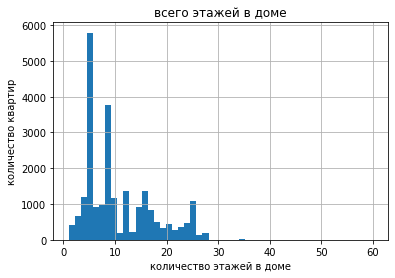

In [6]:
df['floors_total'].hist(bins=50)
plt.title("всего этажей в доме")
plt.xlabel("количество этажей в доме")
plt.ylabel("количество квартир");

In [7]:
df = df.dropna(subset=['floors_total']).reset_index(drop=True) # удаляем строки с пустыми значениями
display(df['floors_total'].isna().sum()) # проверка метода
df['floors_total'] = df['floors_total'].astype('int') # изменение типа данных в целочисленный
df['floors_total'].dtypes # проверка метода

0

dtype('int64')

Рассмотрим столбец **is_apartment** (апартаменты, булев тип), который подразумевает True - квартира в объявлении является апартаментами, False - соответственно нет. В столбце более **88%** пропусков. Можно предположить, что эти пропуски связвны с тем, что пользователи просто не указывали данные об апартаментах и отсутствующие знаения - False. Поэтому я заполню именно значением **False**, которое указывает, что квартира в объявлении не апартаменты

In [8]:
df['is_apartment'] = df['is_apartment'].fillna(value=False) # заполнение пропущенных значений
display(df['is_apartment'].isna().sum()) # проверим работу метода 
df['is_apartment'].value_counts()        # посмотрим на распределение

0

False    23563
True        50
Name: is_apartment, dtype: int64

Рассмотрим столбец **ceiling_height** (высота потолков выраженная в метрах). 

In [9]:
df['ceiling_height'].unique()

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.16,   3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,
         5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,
         2.83,   4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,
         3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
      

После первичного взгляда на значения видно, что с данными не все в порядке. Посмотрим на диаграмму размаха

(1.0, 10.0)

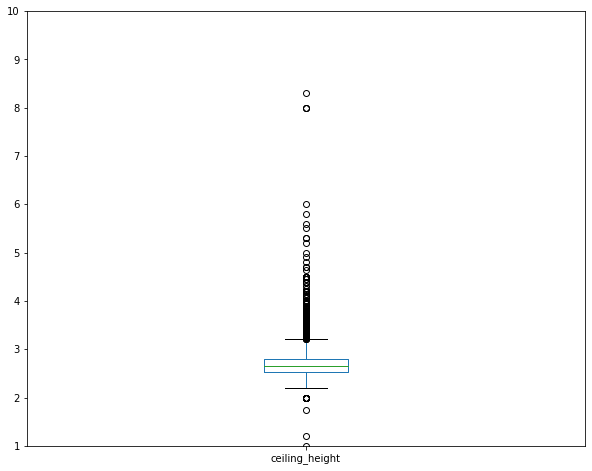

In [10]:
plt.figure(figsize=(10, 8))
df['ceiling_height'].plot.box()
plt.ylim(1, 10)

Зафиксируем данные в числах, применю к столбцу ceiling_height метод describe

In [11]:
df['ceiling_height'].describe() 

count    14495.000000
mean         2.771495
std          1.261445
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

In [12]:
df['ceiling_height'].mode() # наиболее часто встречающеея значение

0    2.5
dtype: float64

В данных более 38 процентов пропущенных значений. Медиана ровна 2,65 метра.
Чтобы не потерять данные, заменю пропущенные значения на наиболее часто встречающееся, оно выглядит правдопадобным и разумным

In [13]:
df['ceiling_height'] = df['ceiling_height'].fillna(value=df['ceiling_height'].mode()[0]) # заполнение пропущенных значений
df['ceiling_height'].isna().sum() # проверим работу метода 

0

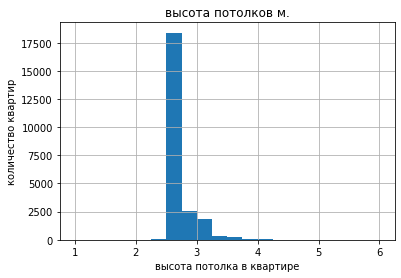

In [14]:
df['ceiling_height'].hist(bins=20, range=(1, 6))
plt.title("высота потолков м.")
plt.xlabel("высота потолка в квартире")
plt.ylabel("количество квартир");

Потолки выше 3х метров — уже редки. А на участке более 4 метров гистограмма сливается с нулём (это не значит, что там ровно 0, но таких квартир единицы).
Примем верхнюю границу 3,5 метра. Это число кажется разумным: потолки выше - большая редкость. Если отбросить значения больше, много данных не потеряется. Да и вряд ли в стандартных квартирах будут такие потолки. Это больше похоже на вброс. Тоже касается нижней границы. Установим ее на отметке 2,40 метра
Продолжаем работать с наблюдениями, удовлетворяющими условию: `df.query('2.4 < ceiling_height < 3.5')`
перезапишем датафрейм, отбросив выбивающиеся значения

In [15]:
display(len(df.query('ceiling_height > 3.5')))
len(df.query('2.4 > ceiling_height'))
# узнаем количество аномальных значений. Насколько критично будет их отбросить

304

21

(23135, 22)


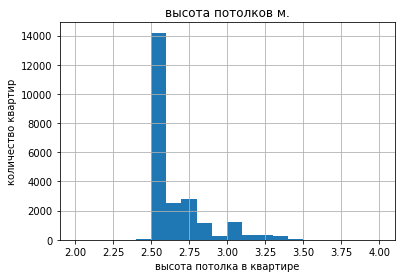

In [16]:
df = df.query('2.4 < ceiling_height < 3.5') # перезапишем датафрейм, отбросив аномальные значения 
print(df.shape) # проверим сколько объектов осталось в датафрейм
df['ceiling_height'].hist(bins=20, range=(2, 4))
plt.title("высота потолков м.")
plt.xlabel("высота потолка в квартире")
plt.ylabel("количество квартир");
# проверим рвботу метода посмотрев на распределения теперь

Рассмотрим **balcony** (число балконов).
Большое количество пропусков скорее всего указывает на то, что пользователь не указал балкон в объявлении так как его просто нет. В таком случае логично было бы заменить значения на 0

In [17]:
df['balcony'].value_counts()

1.0    4124
2.0    3631
0.0    3629
5.0     298
4.0     178
3.0      80
Name: balcony, dtype: int64

In [18]:
df['balcony'] = df['balcony'].fillna(value=0) # заполняю пропущенные значения нулем
display(df['balcony'].isna().sum())   # проверка работы метода
display(df['balcony'].value_counts()) # проверка работы метода

0

0.0    14824
1.0     4124
2.0     3631
5.0      298
4.0      178
3.0       80
Name: balcony, dtype: int64

In [19]:
display(df['balcony'].dtypes)
df['balcony'] = df['balcony'].astype('int') # для удобства расчетов переведем в целочисленный тип
df['balcony'].dtypes # проверка метода

dtype('float64')

dtype('int64')

Рассмотрим **locality_name** 

In [20]:
df['locality_name'].unique() # в уникальных значениях замечены неявные дубликаты: посЁлок/посЕлок

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [21]:
df['locality_name'] = df['locality_name'].str.replace('посёлок', 'поселок') # замена строки на единый стиль
df['locality_name'].unique() # проверка метода

array(['Санкт-Петербург', 'поселок Шушары', 'городской поселок Янино-1',
       'поселок Парголово', 'поселок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'поселок Металлострой',
       'поселок городского типа Лебяжье',
       'поселок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'поселок Аннино',
       'поселок городского типа Ефимовский', 'поселок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'поселок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'Сланцы', 'село Пут

Пропущенные значения столбца - менее одного процента, отбрасываю.

In [22]:
df = df.dropna(subset=['locality_name']).reset_index(drop=True) # удаление пропущенных значений из датафрейм
df['locality_name'].isna().sum() # проверка метода

0

### Выводы
* ceiling_height - выбросы удалила, теперь потолки от 2,4 до 3,5, пропущенные значения заменила на наиболее часто встречающееся значение =2,5
* floors_total - удалила пропущенные значения менее одного процента, поменяла на int
* is_apartment - пропущенные значения заменила на false
* balcony - пропущенные значения заменила на 0, поменяла на int
* locality_name - удалила строки с пропущенными значениями менее одного процента, заменила неявные дубликаты

Большинство оставшихся данных заполняются автоматически на основе картографических данных.

living_area, kitchen_area - важные параметры данных с большим процентом пропусков. Для этого типа данных нет подходящего значения на замену. Отсутствие значения — тоже важный сигнал, который не нужно прятать. Пропущенные значения - сигнал, о проблеме в данных. Надо поговорить с разработчиками и выяснить причину недостающих сведений 

## Расчёты и добавление результатов в таблицу

Добавление в таблицу: 
* цену квадратного метра
* день недели, месяц и год публикации объявления - три новых столбца в датафрейм для каждого значения
* этаж квартиры
* соотношение жилой и общей площади, а также отношение площади кухни к общей

In [23]:
df['square_meter_price'] = df['last_price'] / df['total_area'] # добавление цены за квадратный метр
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%d %H:%M') # # приведение к типу даты дату публикации
df['weekday'] = df['first_day_exposition'].dt.weekday # добавление дня недели публикации объявления
df['month'] = df['first_day_exposition'].dt.month # добавление месяца публикации объявления
df['year'] = df['first_day_exposition'].dt.year # добавление года публикации объявления
df.head() # обзор получившейся таблицы

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter_price,weekday,month,year
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,16028.0,1.0,482.0,2.0,755.0,NaN,120370.370370,3,3,2019
1,7,3350000.0,40.4,2018-12-04,1,2.50,11,18.6,1,False,...,18603.0,0.0,NaN,0.0,NaN,81.0,82920.792079,1,12,2018
2,10,5196000.0,56.0,2015-08-20,2,2.50,5,34.3,4,False,...,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286,3,8,2015
3,0,64900000.0,159.0,2015-07-24,3,2.50,14,NaN,9,False,...,6800.0,2.0,84.0,3.0,234.0,424.0,408176.100629,4,7,2015
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000,1,6,2018


Добавление в таблицу столбца **floor_category** с новыми категориями по этажам

In [24]:
def floor_category(row): # функция возвращает категорию этажа по значению столбца floor и floors_total
    if row['floor'] == 1:
        return 'первый'
    if row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
df['floor_category'] = df.apply(floor_category, axis=1)
display(df['floor_category'].value_counts()) # посмотрим распределение 
df.head() # проверим работу функции

другой       17016
последний     3224
первый        2849
Name: floor_category, dtype: int64

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter_price,weekday,month,year,floor_category
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,1.0,482.0,2.0,755.0,NaN,120370.370370,3,3,2019,другой
1,7,3350000.0,40.4,2018-12-04,1,2.50,11,18.6,1,False,...,0.0,NaN,0.0,NaN,81.0,82920.792079,1,12,2018,первый
2,10,5196000.0,56.0,2015-08-20,2,2.50,5,34.3,4,False,...,1.0,90.0,2.0,574.0,558.0,92785.714286,3,8,2015,другой
3,0,64900000.0,159.0,2015-07-24,3,2.50,14,NaN,9,False,...,2.0,84.0,3.0,234.0,424.0,408176.100629,4,7,2015,другой
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,2.0,112.0,1.0,48.0,121.0,100000.000000,1,6,2018,другой


Добавление в таблицу соотношения жилой и общей площади, а также отношение площади кухни к общей.

In [25]:
df['area_ratio'] = df['living_area'] / df['total_area'] *100 # в процентном соотношении
df['kitchen_ratio'] = df['kitchen_area'] / df['total_area'] *100
df.head() # обзор таблицы

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,square_meter_price,weekday,month,year,floor_category,area_ratio,kitchen_ratio
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,2.0,755.0,NaN,120370.370370,3,3,2019,другой,47.222222,23.148148
1,7,3350000.0,40.4,2018-12-04,1,2.50,11,18.6,1,False,...,0.0,NaN,81.0,82920.792079,1,12,2018,первый,46.039604,27.227723
2,10,5196000.0,56.0,2015-08-20,2,2.50,5,34.3,4,False,...,2.0,574.0,558.0,92785.714286,3,8,2015,другой,61.250000,14.821429
3,0,64900000.0,159.0,2015-07-24,3,2.50,14,NaN,9,False,...,3.0,234.0,424.0,408176.100629,4,7,2015,другой,NaN,NaN
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,1.0,48.0,121.0,100000.000000,1,6,2018,другой,32.000000,41.000000


## Исследовательский анализ данных

<a id='intro'></a>

### Изучение основных параметров

Изучим следующие параметры: **площадь, цена, число комнат, высота потолков**

Рассмотрим параметр **total_area** площадь квартиры в квадратных метрах (м²)

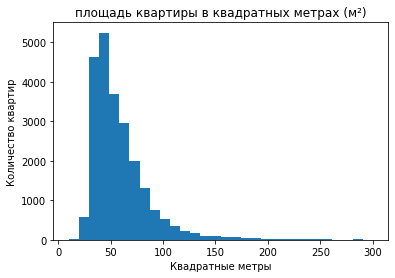

In [26]:
plt.hist(df['total_area'], bins=30, range=(10,300))
plt.title('площадь квартиры в квадратных метрах (м²)')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()

(1.0, 400.0)

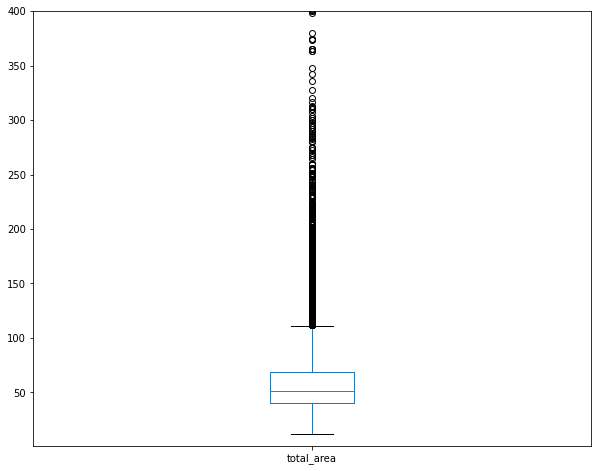

In [27]:
plt.figure(figsize=(10, 8))
df['total_area'].plot.box()
plt.ylim(1, 400)

In [28]:
print('наиболее часто встречающиеся значение:', df['total_area'].mode()[0])
df['total_area'].describe()

наиболее часто встречающиеся значение: 45.0


count    23089.000000
mean        59.236515
std         33.041700
min         12.000000
25%         40.000000
50%         51.500000
75%         68.600000
max        900.000000
Name: total_area, dtype: float64

Вывод по столбцу **total_area.**

Большинство квартир менее 100 квадратных метров. Однако в данных встречаются очень большие варианты. Максимальная площадь квартиры в датафрейм 900 метров. После 200 метров гистограма сливается с нулем, таких квартир очень мало

Обзор **last_price**

last_price - цена на момент снятия с публикации. Тип данных float64. Доля пропущенных значений 0 %

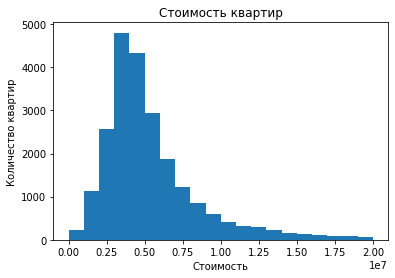

In [29]:
plt.hist(df['last_price'], bins=20, range=(0,20000000))
plt.title('Стоимость квартир')
plt.xlabel('Стоимость')
plt.ylabel('Количество квартир')
plt.show()

(1.0, 50000000.0)

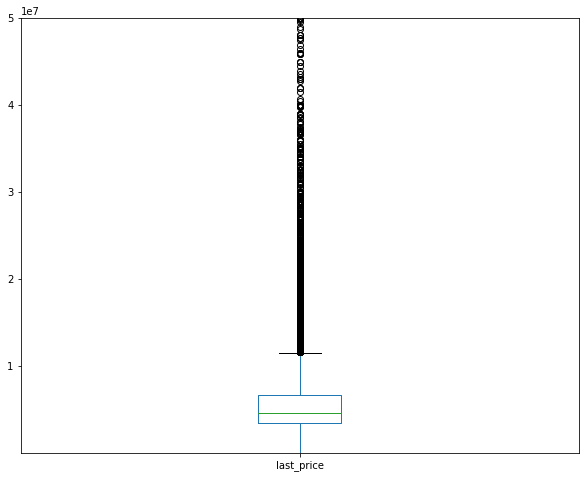

In [30]:
plt.figure(figsize=(10, 8))
df['last_price'].plot.box()
plt.ylim(1, 50000000)

In [31]:
print('наиболее часто встречающиеся значение:', df['last_price'].mode()[0])
df['last_price'].describe().apply("{0:.1f}".format)

наиболее часто встречающиеся значение: 4500000.0


count        23089.0
mean       6299755.8
std       10130327.4
min          12190.0
25%        3400000.0
50%        4600000.0
75%        6650000.0
max      763000000.0
Name: last_price, dtype: object

Вывод по столбцу **last_price** 

Средняя цена на квартиры 6 миллионов рублей. Но этот показатель сильно искажен редкими и выбивающимися значениями - максимальная цена на квартиру 763 миллиона рублей. Чуть меньше 5 миллионов - адекватная цена и медиана датафрейма

Обзор **rooms** - число комнат

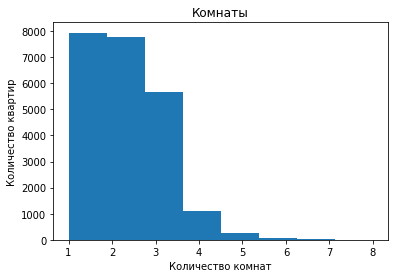

In [32]:
plt.hist(df['rooms'], bins=8, range=(1,8))
plt.title('Комнаты')
plt.xlabel('Количество комнат')
plt.ylabel('Количество квартир')
plt.show()

(-1.0, 20.0)

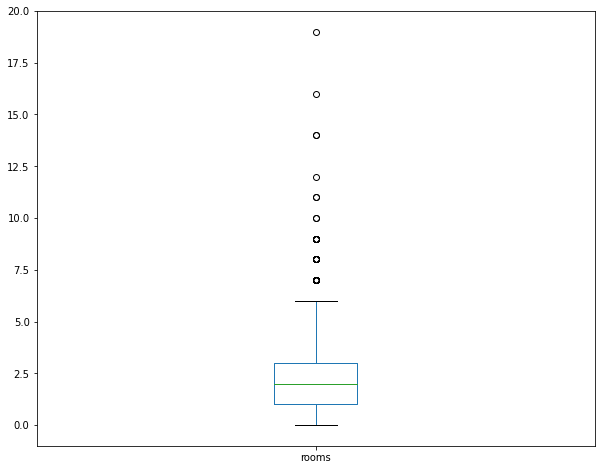

In [33]:
plt.figure(figsize=(10, 8))
df['rooms'].plot.box()
plt.ylim(-1, 20)

In [34]:
print('наиболее часто встречающиеся значение:', df['rooms'].mode()[0])
df['rooms'].describe()

наиболее часто встречающиеся значение: 1


count    23089.000000
mean         2.048205
std          1.049439
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

Вывод по столбцу **rooms**

По гистограмме видно, что 1 и 2-комнатные квартиры наиболее часто встречающиеся варианты, 3-комнатных немного меньше. Также встречаются 4,5,6-комнатные. А вот квартира с 19ю комнатами выглядит странно и неправдопадобно

Обзор **ceiling_height** - высота потолков

напомню, что на этапе предобработки данных я удалила редкие аномальные значения и заполнила пропущенные

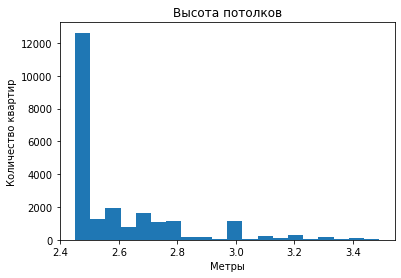

In [35]:
plt.hist(df['ceiling_height'], bins=20)
plt.title('Высота потолков')
plt.xlabel('Метры')
plt.ylabel('Количество квартир')
plt.show()

### Изучение времени продажи квартиры

Рассмотрим время продажи квартиры - **days_exposition**

In [36]:
print('медианное время продажи:', round(df['days_exposition'].median()))
print('среднее время продажи:', round(df['days_exposition'].mean()))

медианное время продажи: 95
среднее время продажи: 179


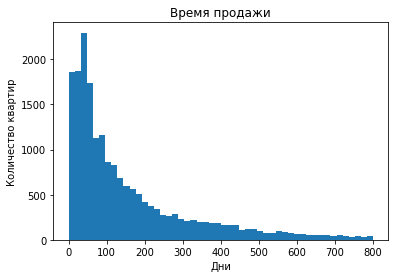

In [37]:
plt.hist(df['days_exposition'], bins=50, range=(0,800))
plt.title('Время продажи')
plt.xlabel('Дни')
plt.ylabel('Количество квартир')
plt.show()

(-10.0, 1500.0)

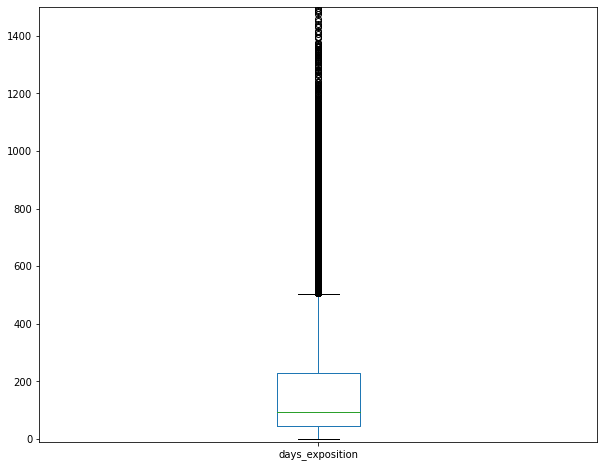

In [38]:
plt.figure(figsize=(10, 8))
df['days_exposition'].plot.box()
plt.ylim(-10, 1500)

In [39]:
print('наиболее часто встречающиеся значение:', df['days_exposition'].mode()[0])
df['days_exposition'].describe()

наиболее часто встречающиеся значение: 45.00000000000001


count    20026.000000
mean       179.494807
std        218.524889
min          1.000000
25%         45.000000
50%         95.000000
75%        229.000000
max       1580.000000
Name: days_exposition, dtype: float64

Вывод **days_exposition**

Полтора - три месяца диапазон обычного времени продажи квартиры.
Есть варианты, которые продавались всего неколько дней. Учитывая, что медианное время продажи 95 дней, можно сказать, что варианты, которые продавались меньше месяца - это быстро. 
В данных встречаются и необычно долгие варианты - более года. Максимальное же значение составило более четырех лет

### Работа с редкими и выбивающиеся значения

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23089 entries, 0 to 23088
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23089 non-null  int64         
 1   last_price            23089 non-null  float64       
 2   total_area            23089 non-null  float64       
 3   first_day_exposition  23089 non-null  datetime64[ns]
 4   rooms                 23089 non-null  int64         
 5   ceiling_height        23089 non-null  float64       
 6   floors_total          23089 non-null  int64         
 7   living_area           21255 non-null  float64       
 8   floor                 23089 non-null  int64         
 9   is_apartment          23089 non-null  bool          
 10  studio                23089 non-null  bool          
 11  open_plan             23089 non-null  bool          
 12  kitchen_area          20911 non-null  float64       
 13  balcony         

In [41]:
# Функция для подсчёта границ с учетом 1.5 размаха
def quartile_range(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    dfq = df.loc[(df[column] < q3 + 1.5*iqr) & (df[column] > q1 - 1.5*iqr), column]
    return dfq
# Столбцы с выбросами
list = ['last_price', 'total_area', 'kitchen_area', 'living_area', 'days_exposition', 'rooms']
for col in list:
    df[col] = quartile_range(df, col)

# Возвращаем в целочисленный тип число комнат
df['rooms'] = df['rooms'].fillna(0).astype(int)

# Изучаем, есть ли выбивающиеся значения
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter_price,weekday,month,year,area_ratio,kitchen_ratio
count,23089.000000,2.118200e+04,21914.000000,23089.000000,23089.000000,23089.000000,20610.000000,23089.000000,19821.000000,23089.000000,...,7711.000000,17640.000000,8734.000000,18369.000000,2.308900e+04,23089.000000,23089.000000,23089.000000,21255.000000,20911.000000
mean,9.860020,4.794100e+06,53.858208,2.002382,2.620214,10.778206,31.365245,5.924466,9.469733,0.598294,...,493.304111,0.755612,521.487062,127.020959,9.854637e+04,2.570661,6.400407,2017.373121,56.405959,18.783987
std,5.658062,2.167818e+06,18.825698,0.972261,0.190185,6.604251,13.792569,4.897159,3.106470,0.962147,...,344.696565,0.928703,277.692372,119.570722,4.731413e+04,1.790202,3.492600,1.036006,10.488460,7.254375
min,0.000000,1.219000e+04,12.000000,0.000000,2.450000,1.000000,2.000000,1.000000,1.300000,0.000000,...,1.000000,0.000000,13.000000,1.000000,1.118349e+02,0.000000,1.000000,2014.000000,2.158273,2.538071
25%,6.000000,3.300000e+06,39.200000,1.000000,2.500000,5.000000,18.300000,2.000000,7.000000,0.000000,...,288.000000,0.000000,298.000000,41.000000,7.638889e+04,1.000000,3.000000,2017.000000,49.450549,13.387097
50%,9.000000,4.400000e+06,50.000000,2.000000,2.500000,9.000000,30.000000,4.000000,9.000000,0.000000,...,455.000000,0.000000,506.000000,84.000000,9.473684e+04,3.000000,6.000000,2017.000000,56.716418,17.280453
75%,14.000000,5.950000e+06,65.000000,3.000000,2.700000,16.000000,40.600000,8.000000,11.000000,1.000000,...,613.000000,1.000000,733.000000,181.000000,1.136364e+05,4.000000,10.000000,2018.000000,63.636364,23.287671
max,50.000000,1.152000e+07,111.400000,5.000000,3.490000,60.000000,77.100000,33.000000,19.450000,5.000000,...,3190.000000,3.000000,1344.000000,504.000000,1.907500e+06,6.000000,12.000000,2019.000000,100.000000,78.787879


**Вывод**

В датафрейме отброшены значения на основе 1.5 размаха. Значения стали лучше и адекватнее.

### Исследование взаимосвязи данных

Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли **цена от площади**, **числа комнат**, **удалённости от центра**. Изучите зависимость цены от того, на каком **этаже** расположена квартира: первом, последнем или другом. Также изучите зависимость от **даты размещения: дня недели, месяца и года.**

Для визуализации взаимосвязи между несколькими переменными использую библиотеку Seaborn, метод pairplot.

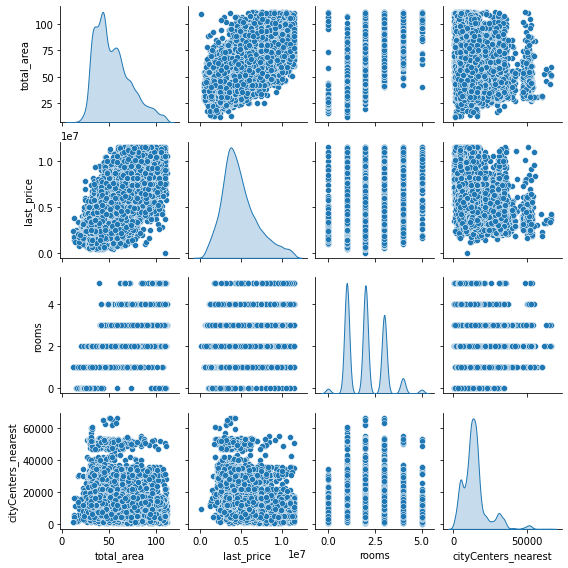

In [42]:
pairplot_df = df[['total_area', 'last_price', 'rooms', 'cityCenters_nearest']]
sns.pairplot(pairplot_df, diag_kind='kde', height=2);

В графиках прослеживаются некоторые закономерные зависимости. Чтобы лучше оценить взаимосвязи остановимся тут подробнее и  разберем каждую пару переменных отдельно

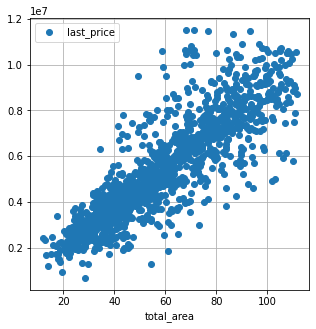

Корреляция цены и площади:
            last_price  total_area
last_price    1.000000    0.907363
total_area    0.907363    1.000000


In [43]:
# Зависимость цены от площади
df.pivot_table(index='total_area', values='last_price').plot(grid=True, style='o', figsize=(5, 5))
plt.show()
print('Корреляция цены и площади:')
print(df.pivot_table(index='floor', values=['total_area', 'last_price']).corr())

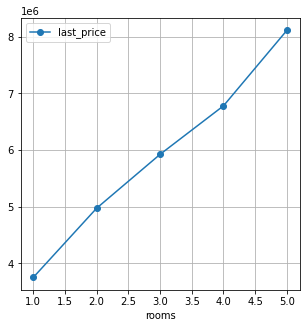

Корреляция цены и числа комнат:
            last_price     rooms
last_price    1.000000  0.545186
rooms         0.545186  1.000000 



In [44]:
# Зависимость цены от числа комнат
df.query('rooms > 0').pivot_table(index='rooms', values='last_price').plot(grid=True, style='o-', figsize=(5, 5))
plt.show()
print('Корреляция цены и числа комнат:')
print(df.query('rooms > 0').pivot_table(index='floor', values=['rooms', 'last_price']).corr(),'\n')

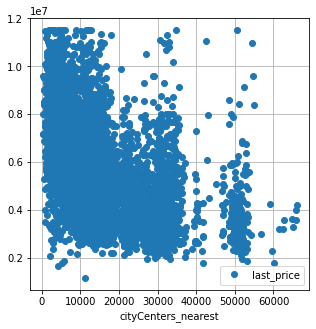

Корреляция цены и удалённости от центра:
                     cityCenters_nearest  last_price
cityCenters_nearest             1.000000    0.700791
last_price                      0.700791    1.000000


In [45]:
# Зависимость цены от удалённости от центра
df.pivot_table(index='cityCenters_nearest', values='last_price').plot(grid=True, style='o', figsize=(5, 5))
plt.show()
print('Корреляция цены и удалённости от центра:')
print(df.pivot_table(index='floor', values=['cityCenters_nearest', 'last_price']).corr())

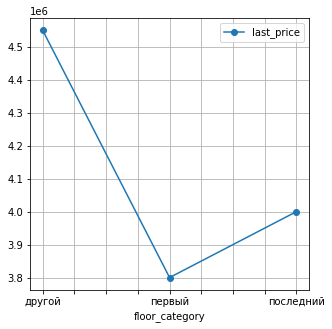

In [46]:
# Зависимость цены от этажа
df.pivot_table(index='floor_category', values='last_price', aggfunc='median').plot(grid=True, style='o-', figsize=(5, 5))
plt.show()

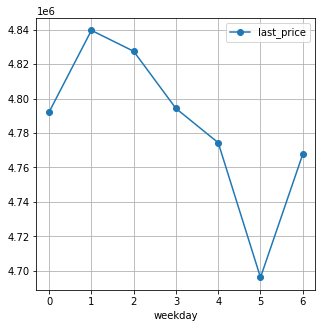

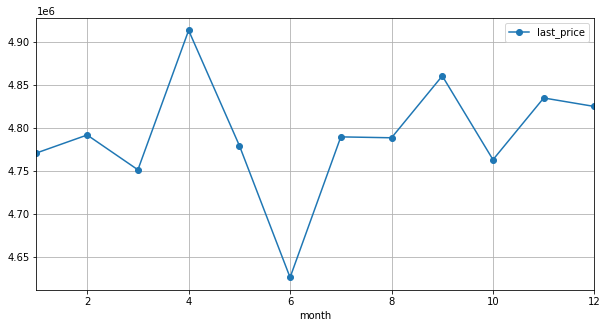

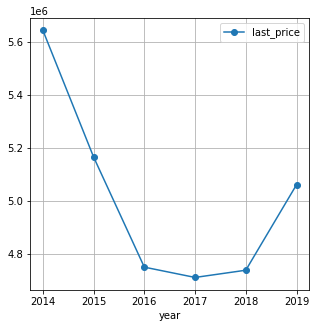

In [47]:
# Зависимость от дня размещения
df.pivot_table(index='weekday', values='last_price').plot(grid=True, style='o-', figsize=(5, 5))
plt.show()
# Зависимость от месяца размещения
df.pivot_table(index='month', values='last_price').plot(grid=True, style='o-', xlim=(1,12), figsize=(10, 5))
plt.show()
# Зависимость от года размещения
df.pivot_table(index='year', values='last_price').plot(grid=True, style='o-', figsize=(5, 5))
plt.show()

**Выводы**

* Корреляция площади и цены очень высокая. Чем больше площадь, тем больше цена.
* Также прямая взаимосвязь наблюдается у параметров цена и число комнат.
* Корреляция 0.7 для параметров цены и удаленности от центра - это средний показатель, однако и там прослеживается тенденция: ближе к центру, выше цена
* Первые этажи имеют наиболее дешевую стоимость квартир. Чуть дороже этого показателя имеет последний этаж. Другие этажи на порядок дороже 
* Дороже всего квартиры, опубликованные во вторник, дешевле всего - в субботу
* Дороже всего квартиры, опубликованные в апреле, дешевле всего - в июне
* В 2016-2018 годах был провал на рынке недвижимости, квартиры сильно упали в цене. Однако в 2019 году замечен рост. Самые высокие цены для периода исследования (2014-2019) были в 2014 году

### Работа с населенными пунктами 

Выберите 10 населённых пунктов с наибольшим числом объявлений

In [48]:
top10 = df['locality_name'].value_counts().head(10) # создадим переменную для среза населенных пунктов
top10

Санкт-Петербург      15255
поселок Мурино         550
поселок Шушары         438
Всеволожск             394
Пушкин                 356
Колпино                337
поселок Парголово      327
Гатчина                305
деревня Кудрово        299
Выборг                 227
Name: locality_name, dtype: int64

Посчитайте среднюю цену квадратного метра в этих населённых пунктах

In [49]:
city_square_meter_price = df.query('locality_name in (@top10.index)').pivot_table(values='square_meter_price', index='locality_name')
city_square_meter_price = city_square_meter_price.astype(int)
city_square_meter_price.sort_values('square_meter_price', ascending=False)

,square_meter_price
locality_name,
Санкт-Петербург,113834
Пушкин,102573
деревня Кудрово,92473
поселок Парголово,90175
поселок Мурино,85603
поселок Шушары,78528
Колпино,75443
Гатчина,68811
Всеволожск,68608


Выделите населённые пункты с самой высокой и низкой стоимостью жилья

Населенные пункты с самой высокой стоимостью жилья:
locality_name
деревня Хязельки     1.100000e+07
поселок Репино       6.889139e+06
Сестрорецк           5.707094e+06
Санкт-Петербург      5.605821e+06
Пушкин               5.295982e+06
Зеленогорск          5.032164e+06
деревня Заневка      4.781500e+06
деревня Мистолово    4.770114e+06
деревня Глинка       4.750000e+06
Павловск             4.671054e+06
Name: last_price, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)
Населенные пункты с самой низкой стоимостью жилья:
locality_name
деревня Фалилеево        650000.0
деревня Коркино          650000.0
деревня Ям-Тесово        625000.0
деревня Выскатка         585000.0
поселок станции Свирь    575000.0
поселок Совхозный        517500.0
деревня Бор              500000.0
деревня Чудской Бор      500000.0
деревня Старополье       460000.0
деревня Вахнова Кара     450000.0
Name: last_price, dtype: float64


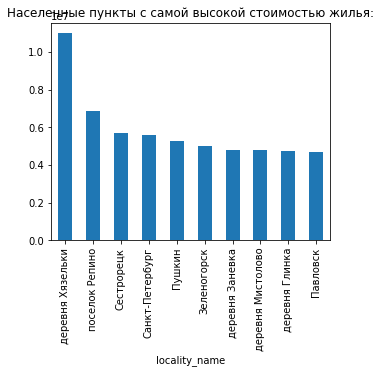

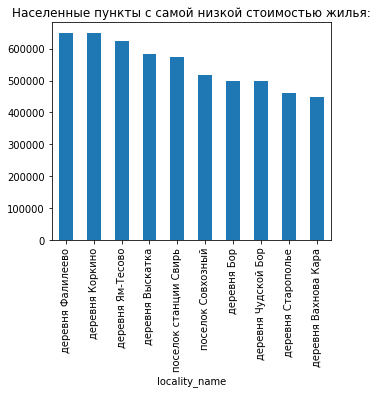

In [50]:
print('Населенные пункты с самой высокой стоимостью жилья:')
print(df.groupby('locality_name')['last_price'].mean().sort_values(ascending=False).head(10))
plt.figure(figsize=(5, 4))
print(df.groupby('locality_name')['last_price'].mean().sort_values(ascending=False).head(10).plot.bar())
plt.title('Населенные пункты с самой высокой стоимостью жилья:')
print('Населенные пункты с самой низкой стоимостью жилья:')
print(df.groupby('locality_name')['last_price'].mean().sort_values(ascending=False).tail(10))
plt.figure(figsize=(5, 4))
df.groupby('locality_name')['last_price'].mean().sort_values(ascending=False).tail(10).plot.bar()
plt.title('Населенные пункты с самой низкой стоимостью жилья:');

**Вывод**

Санкт-Петербург - возглавляет списки по количеству объявлений и по средней стоимости за квадратный метр.
А в списке населенных пунктов с самой высокой стоимостью жилья он лишь на четвертом месте. Данный список возглавляет деревня Хязельки - там продаюся дорогостоящие таунхаусы.

### Исследование Санкт-Петербурга

Задача — выяснить, какая область входит в центр.

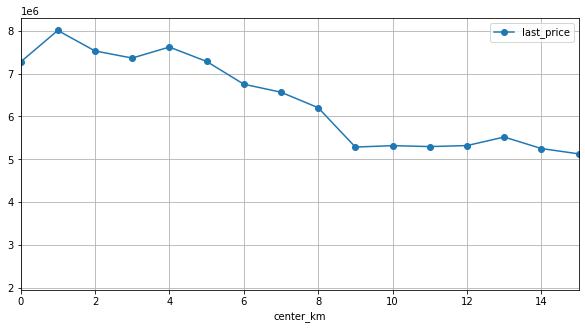

In [51]:
# Добавляем столбец с расстоянием до центра в км, округляем до целого
df['center_km'] = df['cityCenters_nearest'] / 1000
df['center_km'] = df['center_km'].fillna(value=0).astype(int)
# Выбираем Санкт-Петербург, смотрим на график, где указана средняя стоимость для каждого км
(
    df.query('locality_name == "Санкт-Петербург"')
    .pivot_table(index='center_km', values='last_price')
    .plot(grid=True, style='o-', xlim=(0,15), figsize=(10, 5))
)
plt.show()

**Вывод**

График начинает снижаться на пороге четырех метров. Но обозначим границу центра в разумные 6 километров (учитывая протяженность Невского - 4.5 км и некоторых центральных каналов - 8 км)

Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: **площадь, цена, число комнат, высота потолков.** Также выделите факторы, которые влияют на стоимость квартиры (**число комнат, этаж, удалённость от центра, дата размещения объявления)**. Сделайте выводы. Отличаются ли они от общих выводов по всей базе?

Площадь по Санкт-Петербургу (среднее): 56
Площадь в центре (среднее): 68
Площадь по всей базе (среднее): 54


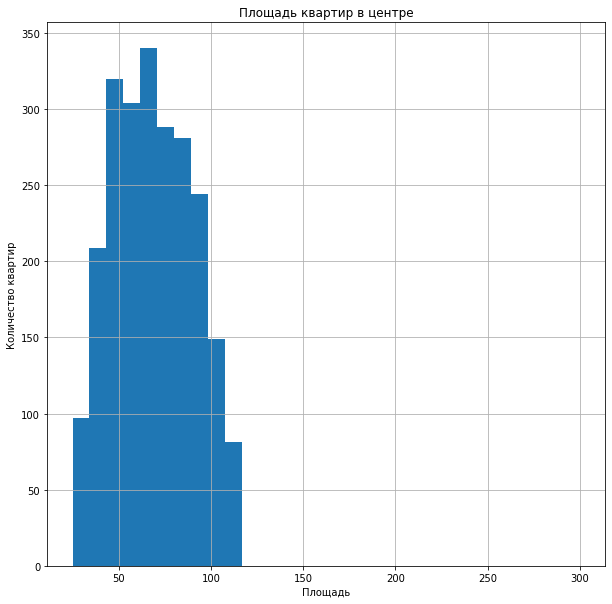

Цена в центре (среднее): 7360032
Цена по Санкт-Петербургу (среднее): 5605821
Цена по всей базе (среднее): 4400000


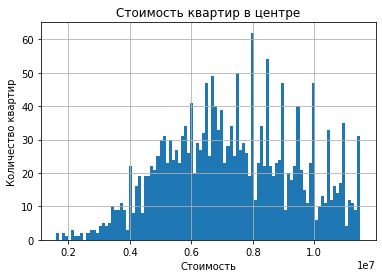

Различие числа комнат в центре и по всему городу


,count,rooms_ratio,center_count,center_rooms_ratio,ratio
rooms,,,,,
1,4868,32.442519,465,16.123440,10.0
2,4996,33.295568,916,31.761442,18.0
3,3998,26.644452,929,32.212205,23.0
4,905,6.031323,408,14.147018,45.0
5,238,1.586138,166,5.755895,70.0



Высота потолков по Санкт-Петербургу (среднее): 2.64
Высота потолков в центре (среднее): 2.8
Высота потолков по всей базе (среднее): 2.62


In [52]:
spb_center = df.query('(locality_name == "Санкт-Петербург") & (center_km <= 6)')

# Изучаем площадь
print('Площадь по Санкт-Петербургу (среднее):', round(df.query('locality_name == "Санкт-Петербург"')['total_area'].mean()))
print('Площадь в центре (среднее):', round(spb_center['total_area'].mean()))
print('Площадь по всей базе (среднее):', round(df['total_area'].mean()))
spb_center['total_area'].hist(bins=30, range=(25,300), figsize=(10,10))
plt.title('Площадь квартир в центре')
plt.xlabel('Площадь')
plt.ylabel('Количество квартир')
plt.show()

# Изучаем стоимость
print('Цена в центре (среднее):', round(spb_center['last_price'].mean()))
print('Цена по Санкт-Петербургу (среднее):', round(df.query('locality_name == "Санкт-Петербург"')['last_price'].mean()))
print('Цена по всей базе (среднее):', round(df['last_price'].median()))
spb_center['last_price'].hist(bins=100)
plt.title('Стоимость квартир в центре')
plt.xlabel('Стоимость')
plt.ylabel('Количество квартир')
plt.show()


# Изучаем число комнат
spb_rooms = df.query('(locality_name == "Санкт-Петербург") & (rooms > 0)').pivot_table(index='rooms', values='floor', aggfunc='count')
spb_rooms.columns = ['count']
spb_rooms['rooms_ratio'] = spb_rooms['count'] / spb_rooms['count'].sum() * 100
spb_rooms_center = df.query('(locality_name == "Санкт-Петербург") & (center_km <= 6)  & (rooms > 0)').pivot_table(index='rooms', values='floor', aggfunc='count')
spb_rooms_center.columns = ['center_count']
spb_rooms_center['center_rooms_ratio'] = spb_rooms_center['center_count'] / spb_rooms_center['center_count'].sum() * 100
rooms_alldata = pd.merge(spb_rooms, spb_rooms_center, 'left', on = 'rooms')
rooms_alldata['ratio'] = round(rooms_alldata['center_count'] / rooms_alldata['count'] * 100)
print('Различие числа комнат в центре и по всему городу')
display(rooms_alldata)


# Изучаем высоту потолков
print()
print('Высота потолков по Санкт-Петербургу (среднее):', df.query('locality_name == "Санкт-Петербург"')['ceiling_height'].mean().round(2))
print('Высота потолков в центре (среднее):', spb_center['ceiling_height'].mean().round(2))
print('Высота потолков по всей базе (среднее):', df['ceiling_height'].mean().round(2))

**Вывод**

- В среднем площадь в центре города выше, чем по всему набору данных почти на 15 метров. Площадь в среднем по городу не сильно отличается от всего датафрейм
- Средняя цена в центре Санкт-Петербурга выше среднего по городу на 1 миллион 700 тысяч, а если говорим про весь датафрейм, то этот показатель больше почти на 3 миллиона
- Хоть доля четырех комнатных квартир в центре города составляет всего 6 процентов от всех квартир, это почти половина всех 4х-комнатных квартир для всего города. А 5-ти комнатные в центре и вовсе занимают 70% распределения по городу. Однушек в центре в два раза меньше, чем везде по городу. Двушки распределились равномерно, почти как и трешки.
- Высота потолков в центре Санкт-Петербурга в среднем выше на 15 сантиметров

Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления).

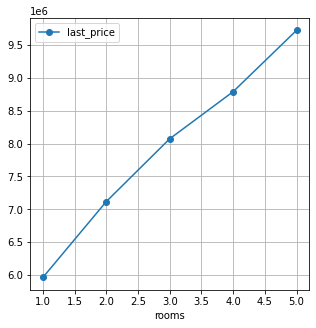

Корреляция цены и числа комнат:
            last_price     rooms
last_price    1.000000  0.402836
rooms         0.402836  1.000000 



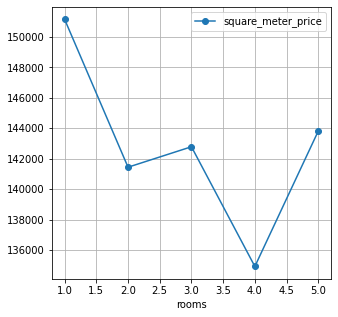

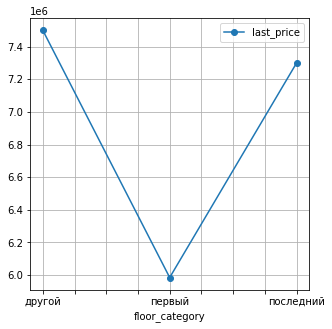

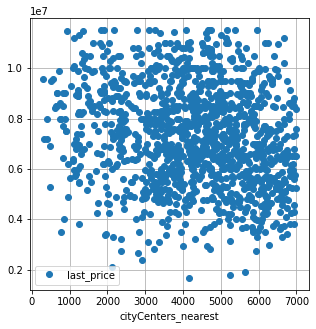

Корреляция цены и удалённости от центра:
                     cityCenters_nearest  last_price
cityCenters_nearest             1.000000    0.076554
last_price                      0.076554    1.000000


In [53]:
# Зависимость цены от числа комнат
(
    spb_center.query('(rooms > 0) & (rooms < 6)').pivot_table(index='rooms', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()
print('Корреляция цены и числа комнат:')
print(spb_center.query('(rooms > 0) & (rooms < 6)').pivot_table(index='floor', values=['rooms', 'last_price']).corr(),'\n')

# Зависимость цены за квадрат от числа комнат
(
    spb_center.query('rooms > 0').pivot_table(index='rooms', values='square_meter_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)

# Зависимость цены от этажа
(
    spb_center.pivot_table(index='floor_category', values='last_price', aggfunc='median')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()

# Зависимость цены от удалённости от центра
(
    spb_center.pivot_table(index='cityCenters_nearest', values='last_price', aggfunc='median')
    .plot(grid=True, style='o', figsize=(5, 5))
)
plt.show()
print('Корреляция цены и удалённости от центра:')
print(spb_center.pivot_table(index='floor', values=['cityCenters_nearest', 'last_price']).corr())

**Вывод**

- Зависимость цены и числа комнат для центра города прослеживается также прямолинейно как и в целом для набора данных. Однако однакомнатные квартиры в центре самые дорогие для за квадратный метр
- В центре города стоимость последнего этажа почти также высока, как и другие этажи (не первый), что не характерно для всего набора данных. Первые этаже стандартно дешевле.
- В центральной зоне почти нет зависимости от удалённости от центра города

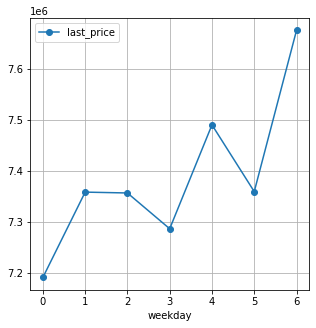

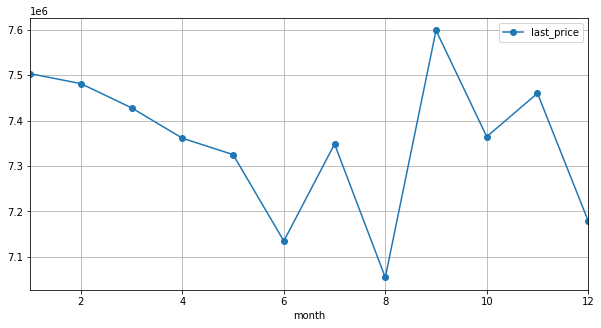

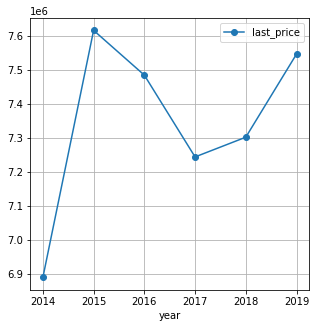

In [54]:
# Зависимость от дня размещения
(
    spb_center.pivot_table(index='weekday', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()
# Зависимость от месяца размещения
(
    spb_center.pivot_table(index='month', values='last_price')
    .plot(grid=True, style='o-', xlim=(1,12), figsize=(10, 5))
)
plt.show()
# Зависимость от года размещения
(
    spb_center.pivot_table(index='year', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()

**Вывод**

Для центра города характерны следующие показатели
* Дороже всего квартиры, опубликованные в воскресенье, дешевле всего - в понедельник
* Дороже всего квартиры, опубликованные в сентябре, дешевле всего - в августе
* В 2015 - пик цены на квартиры в центре. А 2014 - самые низкие показатели. Это противоположно различается с данными по всему датасету. Кризис 16-18 годах тоже прослеживается.

## Общий вывод

В данном проекте я исследовала **параметры, влияющие на рыночную стоимость объектов недвижимости.** Данные были сырыми, поэтому первым шагом был 
* обзор данных

затем
* предобработка данных

Мною были использованы такие методы, как:`info()` собрала общую информацию `isna().sum()` нашла количество пропусков `duplicated().sum()` нашла количество дубликатов. Заполнила пропуски.

* Добавила в датафрейм необходимые столбцы данных

Важным этапом моего исследования был

* Исследовательский анализ данных
Здесь было важно изучить редкие и выбивающиеся значения, почистить от них данные.
Далее мною были построенны гистограммы, демонстрирующие основные показатели. Они и другие графики помогли мне

* ответить на поставленные бизнесом вопросы - крупный этап моего исследования
Какие параметры влияют на стоимоть квартир и как эти показатель различаются в зависимости от расположения

Все необходимые зависимости данных можно отследить в следующих [таблицах](#intro).


Мною была выявлена очевидная зависимость - количество комнат и стоимость квартиры, площадь и стоимость, этажность.

**Срок продажи квартиры**

Чаще всего квартиру продают за 45 дней, медиана 95 дней, среднее - 127..Т.е. нормальное распределение полтора - три месяца для этого показателя. Если меньше, то это быстро, дольше условных 9ти месяцев - долго.

**Стоимость квадратного метра в топ-10 населённых пунктов**

Дороже всего квадратный метр в Санкт-Петербурге - 113834
Дешевле всего квадратный метр в Выборге - 57972

**Стоимость квартир**

Средняя цена на квартиры 5 миллионов рублей. В Санкт-Петербурге и особенно в его центре этот показатель выше

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: цена квадратного метра
- [x]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [x]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [x]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: «Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?»
- [x]  выполнено задание: «Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили».
- [x]  выполнено задание: «Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года». 
- [x]  выполнено задание: «Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце `locality_name`».
- [x]  выполнено задание: «Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (`locality_name`). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона».
- [x]  выполнено задание: «Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всей базе?»
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод